<a href="https://colab.research.google.com/github/BruceMD/BlockingAlgorithms/blob/main/EM_Algorithm_Playing_Around.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Install ipympl

!pip install ipympl

     |████████████████████████████████| 80 kB 4.6 MB/s 


In [ ]:
#@title Import Libraries

%matplotlib inline

import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import FloatSlider, VBox, interactive
from random import randint
from math import sqrt, pi, e, log10, log

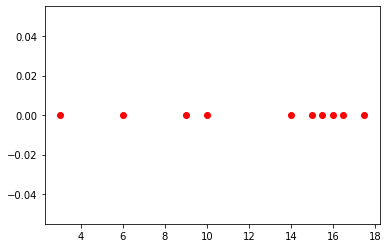

In [ ]:
#@title Basic Display of values

x_points = [3, 6, 9, 10, 14, 15, 15.5, 16, 16.5, 17.5]
y_points = [0 for _ in x_points]

plt.plot(x_points, y_points, "ro")
plt.show()


In [ ]:
#@title Interative Graph with two Guassian Distributions

x_points = [3, 6, 9, 10, 14, 15, 15.5, 16, 16.5, 17.5]
y_points = [0 for _ in x_points]


def plot_graph(mu1, sigma1, mu2, sigma2):

    x1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 1000)
    x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 1000)
    
    plt.plot(x1, stats.norm.pdf(x1, mu1, sigma1))
    plt.plot(x2, stats.norm.pdf(x2, mu2, sigma2))

    plt.plot(x_points, y_points, "ro")
    plt.xlim(0, 20)

    plt.show()


interactive_plot = interactive(plot_graph, mu1=(0.0, 20.0, 0.1), sigma1=(0.0, 8.0, 0.1), mu2=(0.0, 20.0, 0.1), sigma2=(0.0, 8.0, 0.1))

interactive_plot


interactive(children=(FloatSlider(value=10.0, description='mu1', max=20.0), FloatSlider(value=4.0, description…

In [ ]:
#@title Guassian Functions

def probs(x, mu, sigma):
    return (1/(sqrt(2*pi*sigma**2))* e**(-(x - mu)**2/(2*sigma**2)))


def p_dev(x_lis, mu, sigma):
    p_lis = []
    for num in x_lis:
        p_lis.append(probs(num, mu, sigma))

    return p_lis


[0.5699175434306182, 5.8531993332058256e-05, 6.340699629911033e-17, 1.0992283752437694e-22, 1.360624352756007e-54, 8.731978226394339e-65, 3.254105435591437e-70, 7.280677247939283e-76, 9.779870876461197e-82, 3.818733509550262e-94]
[0.24937582040200026, 0.006331212017054292, 1.6954381451316946e-12, 1.8446604756698272e-17, 3.542433618364802e-46, 1.4267893774930057e-55, 1.332050576039794e-60, 7.46625373016341e-66, 2.512499346564456e-71, 6.157096085412612e-83]


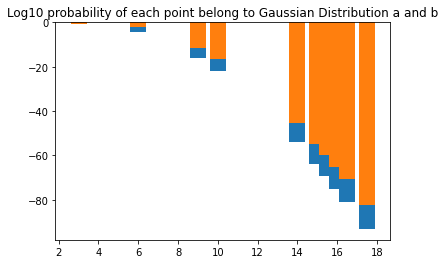

In [ ]:
#@title Generate list of probabilities for each value x to belong to Gaussian distribution a and b

xa_lis = p_dev(x_points, 3, 0.7)
xb_lis = p_dev(x_points, 3.9, 0.7)

print(xa_lis)
print(xb_lis)

plt.bar(x_points, [log10(y) for y in xa_lis])
plt.bar(x_points, [log10(y) for y in xb_lis])
plt.title("Log10 probability of each point belong to Gaussian Distribution a and b")
plt.show()

[0.6956208466825228, 0.009160303329353435, 3.7397191538709794e-05, 5.9589384578231634e-06, 3.84093110588198e-09, 6.120019085362974e-10, 2.4429293401688885e-10, 9.751446321487342e-11, 3.8924869331621224e-11, 6.2021665027673e-12]
[0.3043791533174773, 0.9908396966706465, 0.9999626028084613, 0.9999940410615422, 0.999999996159069, 0.9999999993879981, 0.9999999997557071, 0.9999999999024856, 0.9999999999610751, 0.9999999999937979]


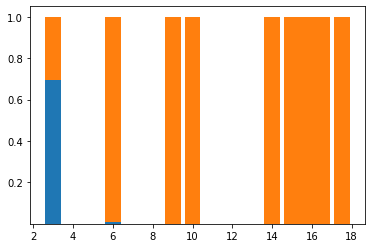

In [ ]:
#@title Showing probability of each point to belong to either Gaussian Distribution a or b

def point_prob(x1, x2):
    
    # assuming priors are equal -> P(a) = P(b) = 0.5
    # can recalculate priors later on
    # no idea what priors are but whatevs, can figure it out later

    return (x1*0.5) / (x1*0.5 + x2*0.5)


a_lis = [point_prob(xa_lis[i], xb_lis[i]) for i in range(len(x_points))]
b_lis = [point_prob(xb_lis[i], xa_lis[i]) for i in range(len(x_points))]

print(a_lis)
print(b_lis)

plt.bar(x_points, a_lis)
plt.bar(x_points, b_lis, bottom=a_lis)
#plt.title("Log10 probability of each point belong to Gaussian Distribution a and b")
plt.show()

3.039367331591351 0.34539024620993475
12.948413889443332 9.936471842774772


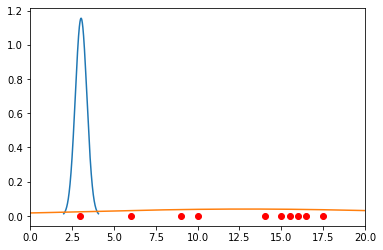

In [ ]:
#@title Calculate new mu's and sigma's

mu1 = sum([a_lis[i]*x_points[i] for i in range(len(x_points))]) / sum(a_lis)
mu2 = sum([b_lis[i]*x_points[i] for i in range(len(x_points))]) / sum(b_lis)

sigma1 = sqrt(sum([a_lis[i]*(x_points[i] - 3)**2 for i in range(len(x_points))]) / sum(a_lis))
sigma2 = sqrt(sum([b_lis[i]*(x_points[i] - 3.9)**2 for i in range(len(x_points))]) / sum(b_lis))

print(mu1, sigma1)
print(mu2, sigma2)

x1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 1000)
x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 1000)

plt.plot(x1, stats.norm.pdf(x1, mu1, sigma1))
plt.plot(x2, stats.norm.pdf(x2, mu2, sigma2))

plt.plot(x_points, y_points, "ro")
plt.xlim(0, 20)

plt.show()

This currently shows the first step towards the Expectation Maximisation algorithm, but it does not iterate down to the final values for mu and sigma.

Let's optimise and recursively find the best values

In [ ]:
#@title EM Algorithm Implementation

x_points = [3, 6, 9, 10, 14, 15, 15.5, 16, 16.5, 17.5]



At some point, it would be nice to demonstrate the 3D mapping of optimisation...

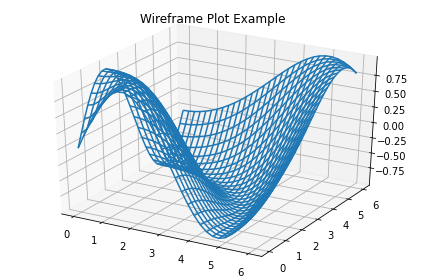

In [ ]:
#@title Incomplete Wireframe 3D Graph

fig = plt.figure()
ax = plt.axes(projection='3d')

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(0, 6, 30)
y = np.linspace(0, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax.plot_wireframe(X, Y, Z, cmap='viridis')

plt.title("Wireframe Plot Example")
plt.tight_layout()
plt.show()